In [1]:
import pandas as pd
import numpy as np
import ast
import json
import string
import re
import nltk
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import statsmodels.api as sm
import sys
import os
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from pandas import Series, DataFrame
from statsmodels.compat import lzip
from datetime import datetime
from scipy.stats import shapiro
import json
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
import sys
import os
os.chdir(r"C:\Users\Asus\OneDrive\Desktop\Semester 2\Data Mining for business analytics\FINAL PROJECT")

In [3]:
# Read CSV files into primary dataframes

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


### DATA CLEANING

In [5]:
# Observe our dataset dimensions

print(df1.shape)
print(df2.shape)

(4803, 4)
(4805, 20)


### Cleaning Df1

#### Unpacking “packed” fields: 'cast' and 'crew'

In [6]:
# Convert strings to lists of dictionaries

df1["cast"] = df1["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create new column in df1 - 'cast_names'

df1["cast_names"] = df1["cast"].apply(lambda x: [d["name"] for d in x])

Note: We have used the ast.literal_eval() which is a Python built-in function that evaluates a string containing a literal (such as a dictionary, list, tuple, number, or boolean) and returns the corresponding Python object. Also used a lambda function to iterate over each element of the "cast" column (which is a list of dictionaries) and extracted the value associated with the key "name" from each dictionary, creating a new list of names.

In [7]:
df1

,movie_id,title,cast,crew,cast_names
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Christian Bale, Michael Caine, Gary Oldman, A..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Taylor Kitsch, Lynn Collins, Samantha Morton,..."
...,...,...,...,...,...
4798,9367,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua..."
4799,72766,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...","[Edward Burns, Kerry Bishé, Marsha Dietlein, C..."
4800,231617,"Signed, Sealed, Delivered","[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo..."
4801,126186,Shanghai Calling,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...","[Daniel Henney, Eliza Coupe, Bill Paxton, Alan..."


In [8]:
# Examine members of the crew list

crew_list = json.loads(df1['crew'][1])
for crew_member in crew_list:
    print(crew_member['job'])

Director of Photography
Director
Producer
Screenplay
Screenplay
Editor
Editor
Original Music Composer
Executive Producer
Producer
Producer
Producer
Producer
Casting
Production Design
Art Direction
Casting
Set Decoration
Costume Design
Costume Design
Music Supervisor
Conceptual Design
Makeup Department Head
Stunts
CGI Supervisor
Script Supervisor
Special Effects Coordinator
Music Editor
Script Supervisor
Music Editor
Script Supervisor
Music Editor


A JSON (JavaScript Object Notation) object is a data structure that stores data in a text format using a collection of key-value pairs. 

Here, the json.loads() function is used to convert the string representation of a JSON object stored in the 'crew' column of dataframe df1 into a Python list of dictionaries, which is assigned to the variable crew_list.Then, a loop is iterated over each dictionary in crew_list, and the value associated with the key 'job' is printed for each dictionary. This code has been used to extract and display the 'job' information for each crew member in the 'crew' column. 

In [9]:
# Apply literal_eval to convert stringified dictionaries to dictionaries (ensuring that our data is in dictionary format)

df1["crew"] = df1["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract names of director, producer, and screenplay writer from crew list

df1["director"] = df1["crew"].apply(lambda x: [d["name"] for d in x if d["job"] == "Director"][0] if [d["job"] for d in x if d["job"] == "Director"] else None)
df1["producer"] = df1["crew"].apply(lambda x: [d["name"] for d in x if d["job"] == "Producer"])
df1["screenplay_writer"] = df1["crew"].apply(lambda x: [d["name"] for d in x if d["job"] == "Screenplay"])


Reasons for including the following crew members:

Director: The director has a significant impact on the overall vision and style of a movie, including the tone, pacing, camera work, and performance direction. Movies directed by the same director may have similar themes, visual styles, or narrative techniques, which can be used for recommendation purposes.

Screenplay writer: The screenplay is the foundation of a movie, providing the story, characters, dialogue, and structure. Similarities between movies based on the same source material or with similar themes, genres, or narrative structures can be identified and used for recommendation.

Producer: The producer oversees the financial and logistical aspects of a movie, including casting, hiring, scheduling, and marketing. The production company or studio associated with a movie may have a specific brand or target audience, which can be used for recommendation purposes. Additionally, producers may have a track record of successful movies or collaborations with specific directors or actors, which can also be used as a recommendation feature.

In [10]:
df1

,movie_id,title,cast,crew,cast_names,director,producer,screenplay_writer
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[James Cameron, Jon Landau]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Ted Elliott, Terry Rossio]"
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[Barbara Broccoli, Michael G. Wilson]","[John Logan, Robert Wade, Neal Purvis, Jez But..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christopher Nolan, Jonathan Nolan]"
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[Colin Wilson, Jim Morris, Lindsey Collins]","[Andrew Stanton, Michael Chabon, Mark Andrews]"
...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,"[Robert Rodriguez, Carlos Gallardo]",[]
4799,72766,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...","[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",Edward Burns,"[Edward Burns, William Rexer, Aaron Lubin]",[]
4800,231617,"Signed, Sealed, Delivered","[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith,[Harvey Kahn],[]
4801,126186,Shanghai Calling,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...","[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",Daniel Hsia,[],[]


In [11]:
# Examine empty values in the directors column

df1[df1['director'].isnull()]['title'] 

3661                                            Flying By
3670                                      Running Forever
3729                                                  Paa
3977                                   Boynton Beach Club
4068                                            Sharkskin
4105      The Book of Mormon Movie, Volume 1: The Journey
4118                               Hum To Mohabbat Karega
4123                                       Roadside Romeo
4247                                Me You and Five Bucks
4305                            Down & Out With The Dolls
4314                                            Crowsnest
4322                                   Sex With Strangers
4374                                Dream with the Fishes
4401                                  The Helix... Loaded
4405                                    Karachi se Lahore
4458                                  Harrison Montgomery
4504                              Light from the Darkroom
4553          

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           4803 non-null   int64 
 1   title              4803 non-null   object
 2   cast               4803 non-null   object
 3   crew               4803 non-null   object
 4   cast_names         4803 non-null   object
 5   director           4773 non-null   object
 6   producer           4803 non-null   object
 7   screenplay_writer  4803 non-null   object
dtypes: int64(1), object(7)
memory usage: 300.3+ KB


In [13]:
# Drop null values from the "director" column
df1.dropna(subset=['director'], inplace=True)

# Verify the changes
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4773 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           4773 non-null   int64 
 1   title              4773 non-null   object
 2   cast               4773 non-null   object
 3   crew               4773 non-null   object
 4   cast_names         4773 non-null   object
 5   director           4773 non-null   object
 6   producer           4773 non-null   object
 7   screenplay_writer  4773 non-null   object
dtypes: int64(1), object(7)
memory usage: 335.6+ KB
None


In [14]:
# describe NaN and empty cells in each column

for col in df1.columns:
    nan_count = df1[col].isna().sum()
    empty_count = df1[col].eq('').sum()
    print(f"Column {col}: NaN count = {nan_count}, Empty count = {empty_count}")

Column movie_id: NaN count = 0, Empty count = 0
Column title: NaN count = 0, Empty count = 0
Column cast: NaN count = 0, Empty count = 0
Column crew: NaN count = 0, Empty count = 0
Column cast_names: NaN count = 0, Empty count = 0
Column director: NaN count = 0, Empty count = 0
Column producer: NaN count = 0, Empty count = 0
Column screenplay_writer: NaN count = 0, Empty count = 0


In [15]:
df1

,movie_id,title,cast,crew,cast_names,director,producer,screenplay_writer
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[James Cameron, Jon Landau]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Ted Elliott, Terry Rossio]"
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[Barbara Broccoli, Michael G. Wilson]","[John Logan, Robert Wade, Neal Purvis, Jez But..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christopher Nolan, Jonathan Nolan]"
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[Colin Wilson, Jim Morris, Lindsey Collins]","[Andrew Stanton, Michael Chabon, Mark Andrews]"
...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,"[Robert Rodriguez, Carlos Gallardo]",[]
4799,72766,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...","[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",Edward Burns,"[Edward Burns, William Rexer, Aaron Lubin]",[]
4800,231617,"Signed, Sealed, Delivered","[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith,[Harvey Kahn],[]
4801,126186,Shanghai Calling,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...","[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",Daniel Hsia,[],[]


In [16]:
df1 = df1.dropna()  # Drop rows with missing values
df1 = df1.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
df1 = df1.dropna()  # Drop rows with NaN values

In [17]:
df1= df1.reindex(columns = ['movie_id', 'title', 'cast_names', 'director'])
df1

,movie_id,title,cast_names,director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton
...,...,...,...,...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez
4799,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",Edward Burns
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith
4801,126186,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",Daniel Hsia


Seperating Cast into Top 3

In [18]:
df1[['cast1', 'cast2', 'cast3']] = df1['cast_names'].apply(lambda x: (x[0], x[1], x[2]) if len(x)>=3 else [None, None, None]).apply(pd.Series)

In [19]:
df1

,movie_id,title,cast_names,director,cast1,cast2,cast3
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton
...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,Carlos Gallardo,Jaime de Hoyos,Peter Marquardt
4799,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",Edward Burns,Edward Burns,Kerry Bishé,Marsha Dietlein
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith,Eric Mabius,Kristin Booth,Crystal Lowe
4801,126186,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",Daniel Hsia,Daniel Henney,Eliza Coupe,Bill Paxton


In [20]:
df1 = df1.drop('cast_names', axis=1)

In [21]:
df1

,movie_id,title,director,cast1,cast2,cast3
0,19995,Avatar,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver
1,285,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley
2,206647,Spectre,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux
3,49026,The Dark Knight Rises,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman
4,49529,John Carter,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton
...,...,...,...,...,...,...
4798,9367,El Mariachi,Robert Rodriguez,Carlos Gallardo,Jaime de Hoyos,Peter Marquardt
4799,72766,Newlyweds,Edward Burns,Edward Burns,Kerry Bishé,Marsha Dietlein
4800,231617,"Signed, Sealed, Delivered",Scott Smith,Eric Mabius,Kristin Booth,Crystal Lowe
4801,126186,Shanghai Calling,Daniel Hsia,Daniel Henney,Eliza Coupe,Bill Paxton


### Cleaning Df2

In [22]:
df2["release_date"] = pd.to_datetime(df2["release_date"])
df2["release_year"] = df2["release_date"].dt.year

In [23]:
df2['first_genre'] = ""

In [24]:
# Extract the first genre from the 'genres' column for each row
for i in range(len(df2)):
    if isinstance(df2.loc[i, 'genres'], str):
        # Use regular expressions to extract the first genre from the 'genres' column
        match = re.findall('(?<=name\": \")[^\"]+', df2.loc[i, 'genres'])

        # Add the first genre to the new 'first_genre' column
        if len(match) > 0:
            df2.loc[i, 'first_genre'] = match[0]

In [25]:
df2['first_genre'] = pd.Categorical(df2['first_genre'])

In [26]:
df2 = df2.dropna()  # Drop rows with missing values
df2 = df2.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
df2 = df2.dropna()  # Drop rows with NaN values
df2.drop_duplicates(inplace=True)

In [27]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,first_genre
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,2009.0,Action


In [28]:
df2["profit"] = df2["revenue"] - df2["budget"] #created profit column

In [29]:
df2 = df2.reindex(columns = ['id', 'first_genre', 'title', 'vote_average', 'revenue', 'budget', 'profit', 'popularity', 'runtime', 'release_year']) #removed unnecessary columns

In [30]:
df2

,id,first_genre,title,vote_average,revenue,budget,profit,popularity,runtime,release_year
0,19995.0,Action,Avatar,7.2,2.787965e+09,237000000.0,2.550965e+09,150.437577,162.0,2009.0
1,597.0,Drama,Titanic,7.5,1.845034e+09,200000000.0,1.645034e+09,100.025899,194.0,1997.0
2,24428.0,Science Fiction,The Avengers,7.4,1.519558e+09,220000000.0,1.299558e+09,144.448633,143.0,2012.0
3,135397.0,Action,Jurassic World,6.5,1.513529e+09,150000000.0,1.363529e+09,418.708552,124.0,2015.0
4,168259.0,Action,Furious 7,7.3,1.506249e+09,190000000.0,1.316249e+09,102.322217,137.0,2015.0
...,...,...,...,...,...,...,...,...,...,...
4768,158895.0,Drama,This Is Martin Bonner,6.6,0.000000e+00,0.0,0.000000e+00,0.763680,83.0,2013.0
4773,228550.0,Horror,Raymond Did It,3.2,0.000000e+00,0.0,0.000000e+00,0.160779,83.0,2011.0
4785,255266.0,Comedy,Dry Spell,6.0,0.000000e+00,22000.0,-2.200000e+04,0.048948,90.0,2013.0
4794,157185.0,Horror,Tin Can Man,2.0,0.000000e+00,13.0,-1.300000e+01,0.332679,84.0,2007.0


In [31]:
movies = df2.merge(df1,on="title")

In [32]:
movies = movies.drop("movie_id", axis=1)

In [33]:
movies

,id,first_genre,title,vote_average,revenue,budget,profit,popularity,runtime,release_year,director,cast1,cast2,cast3
0,19995.0,Action,Avatar,7.2,2.787965e+09,237000000.0,2.550965e+09,150.437577,162.0,2009.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver
1,597.0,Drama,Titanic,7.5,1.845034e+09,200000000.0,1.645034e+09,100.025899,194.0,1997.0,James Cameron,Kate Winslet,Leonardo DiCaprio,Frances Fisher
2,24428.0,Science Fiction,The Avengers,7.4,1.519558e+09,220000000.0,1.299558e+09,144.448633,143.0,2012.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Mark Ruffalo
3,135397.0,Action,Jurassic World,6.5,1.513529e+09,150000000.0,1.363529e+09,418.708552,124.0,2015.0,Colin Trevorrow,Chris Pratt,Bryce Dallas Howard,Irrfan Khan
4,168259.0,Action,Furious 7,7.3,1.506249e+09,190000000.0,1.316249e+09,102.322217,137.0,2015.0,James Wan,Vin Diesel,Paul Walker,Dwayne Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,158895.0,Drama,This Is Martin Bonner,6.6,0.000000e+00,0.0,0.000000e+00,0.763680,83.0,2013.0,Chad Hartigan,Paul Eenhoorn,Richmond Arquette,Sam Buchanan
1489,228550.0,Horror,Raymond Did It,3.2,0.000000e+00,0.0,0.000000e+00,0.160779,83.0,2011.0,Travis Legge,Kyle Hoskins,Elissa Dowling,Linda Cieslik
1490,255266.0,Comedy,Dry Spell,6.0,0.000000e+00,22000.0,-2.200000e+04,0.048948,90.0,2013.0,Travis Legge,Suzi Lorraine,Jared Degado,Heather Dorff
1491,157185.0,Horror,Tin Can Man,2.0,0.000000e+00,13.0,-1.300000e+01,0.332679,84.0,2007.0,Ivan Kavanagh,Michael Parle,Emma Eliza Regan,Patrick O'Donnell


In [38]:
######################## Linear regression with only one independent variable
x = movies['revenue']
##Define the independent variables in the model
y = movies['vote_average']
##Define t he dependent variable in the model

# with statsmodels
x = sm.add_constant(x)  # adding a constant
##Add a constant in the regression model

model1 = sm.OLS(y, x).fit()
##Fit the model
results_model1 = model1.summary()
print(results_model1)

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.95e-23
Time:                        21:05:41   Log-Likelihood:                -28822.
No. Observations:                1493   AIC:                         5.765e+04
Df Residuals:                    1491   BIC:                         5.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.453e+08    1.8e+06     80.500      0.0

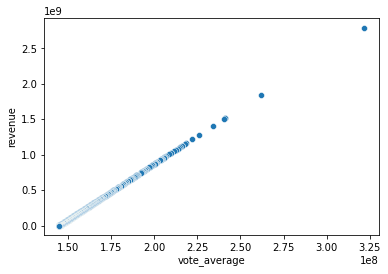

In [39]:
movies["vote_average"] = model1.predict(x)
##Caculate the predicted value of dependent variable based on the model

sns.scatterplot(data=movies, x="vote_average", y="revenue")
plt.show()
##Plot the predicted value against the actual value of charges.

In [40]:
######################## Linear regression with only multiple independent variables

x = movies[['vote_average', 'budget', 'popularity', 'runtime']]
##Define the independent variables in the model
y = movies['revenue']
##Define t he dependent variable in the model

# with statsmodels
x = sm.add_constant(x)  # adding a constant
##Add a constant in the regression model

model2 = sm.OLS(y, x).fit()
##Fit the model
results_model2 = model2.summary()
print(results_model2)
##Output the results

movies["predicted2"] = model2.predict(x)
##Caculate the predicted value of dependent variable based on the model

#sns.scatterplot(data=movies, x="vote_average", y="revenue")
#plt.show()
##Plot the predicted value against the actual value of charges.

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.326e+31
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        21:05:52   Log-Likelihood:                 19028.
No. Observations:                1493   AIC:                        -3.805e+04
Df Residuals:                    1488   BIC:                        -3.802e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.299e+09   2.96e-07  -7.76e+15   

In [41]:
##Regression diagnostic I: multicollinearity
corr_matrix = movies.corr()
print(corr_matrix)

##Regression diagnostic 2: heteroscedasticity in the error term
#names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
#test = sms.het_breuschpagan(model2.resid, model2.model.exog)
#print(lzip(names, test))

##Regression diagnostic 3: autocorrelation
##This is not a time-series dataset. Thus, the concern about autocorrelation is minimul.

##Regression diagnostic 4: model specification errors
##1)The model does not exclude any “core” variables.
##2)The model does not include superfluous variables.
##3)The functional form of the model is suitably chosen.
##4)There are no errors of measurement in the regressand and regressors.
##5)Outliers in the data, if any, are taken into account.

#print(movies.describe())

##6)The probability distribution of the error term is well specified.
#residuals = model2.resid
#print(shapiro(residuals))

                    id  vote_average   revenue    budget    profit  \
id            1.000000     -0.042782 -0.042782 -0.057186 -0.035454   
vote_average -0.042782      1.000000  1.000000  0.744789  0.984464   
revenue      -0.042782      1.000000  1.000000  0.744789  0.984464   
budget       -0.057186      0.744789  0.744789  1.000000  0.616047   
profit       -0.035454      0.984464  0.984464  0.616047  1.000000   
popularity    0.096870      0.593546  0.593546  0.454775  0.580980   
runtime      -0.081876      0.381301  0.381301  0.369025  0.353001   
release_year  0.488224      0.008926  0.008926  0.148124 -0.028439   
predicted2   -0.042782      1.000000  1.000000  0.744789  0.984464   

              popularity   runtime  release_year  predicted2  
id              0.096870 -0.081876      0.488224   -0.042782  
vote_average    0.593546  0.381301      0.008926    1.000000  
revenue         0.593546  0.381301      0.008926    1.000000  
budget          0.454775  0.369025      0.14812

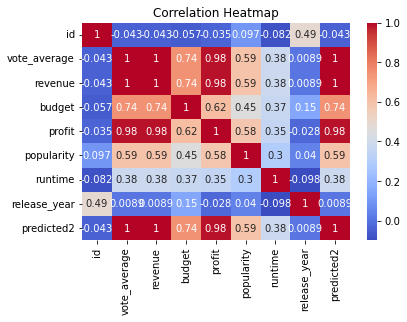

In [42]:
corr_matrix = movies.corr()

# create heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# set title
plt.title('Correlation Heatmap')

# display the plot
plt.show()


In [ ]:
#Bubble plot

# Create a scatter plot with revenue on the x-axis, vote_average on the y-axis, and bubble size indicating popularity
#plt.scatter(movies['popularity'], movies['vote_average'], s=movies['popularity']*10, alpha=0.5)

# Set the x-axis label
#plt.xlabel('popularity')

# Set the y-axis label
#plt.ylabel('Vote Average')

# Set the plot title
#plt.title('Popularity vs. Vote Average')

# Display the plot
#plt.show()

#Analysis 2 - Logit

In [49]:
movies['profit'] = movies['profit'].astype(int)

In [44]:
movies

,id,first_genre,title,vote_average,revenue,budget,profit,popularity,runtime,release_year,director,cast1,cast2,cast3,predicted2
0,19995.0,Action,Avatar,3.214577e+08,2.787965e+09,237000000.0,-2147483648,150.437577,162.0,2009.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,2.787965e+09
1,597.0,Drama,Titanic,2.618677e+08,1.845034e+09,200000000.0,1645034188,100.025899,194.0,1997.0,James Cameron,Kate Winslet,Leonardo DiCaprio,Frances Fisher,1.845034e+09
2,24428.0,Science Fiction,The Avengers,2.412987e+08,1.519558e+09,220000000.0,1299557910,144.448633,143.0,2012.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Mark Ruffalo,1.519558e+09
3,135397.0,Action,Jurassic World,2.409177e+08,1.513529e+09,150000000.0,1363528810,418.708552,124.0,2015.0,Colin Trevorrow,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,1.513529e+09
4,168259.0,Action,Furious 7,2.404577e+08,1.506249e+09,190000000.0,1316249360,102.322217,137.0,2015.0,James Wan,Vin Diesel,Paul Walker,Dwayne Johnson,1.506249e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,158895.0,Drama,This Is Martin Bonner,1.452679e+08,0.000000e+00,0.0,0,0.763680,83.0,2013.0,Chad Hartigan,Paul Eenhoorn,Richmond Arquette,Sam Buchanan,-5.838320e-07
1489,228550.0,Horror,Raymond Did It,1.452679e+08,0.000000e+00,0.0,0,0.160779,83.0,2011.0,Travis Legge,Kyle Hoskins,Elissa Dowling,Linda Cieslik,-5.812350e-07
1490,255266.0,Comedy,Dry Spell,1.452679e+08,0.000000e+00,22000.0,-22000,0.048948,90.0,2013.0,Travis Legge,Suzi Lorraine,Jared Degado,Heather Dorff,-5.772066e-07
1491,157185.0,Horror,Tin Can Man,1.452679e+08,0.000000e+00,13.0,-13,0.332679,84.0,2007.0,Ivan Kavanagh,Michael Parle,Emma Eliza Regan,Patrick O'Donnell,-5.814517e-07


In [50]:
movies['profit_true'] = movies['profit'].apply(lambda x: 1 if x > 0 else 0)
movies['profit_true']
######################## Logit regression with only one independent variable
x = movies['popularity']
##Define the independent variables in the model
y = movies['profit_true']
##Define t he dependent variable in the model

# with statsmodels
x = sm.add_constant(x)  # adding a constant
##Add a constant in the regression model

model1 = sm.Logit(y, x).fit()
##Fit the model
results_model1 = model1.summary()
print(results_model1)
##Output the results




######################## Linear regression with only multiple independent variables

x = movies[['popularity', 'budget', 'vote_average']]
##Define the independent variables in the model
y = movies['profit_true']
##Define the dependent variable in the model

# with statsmodels
x = sm.add_constant(x)  # adding a constant
##Add a constant in the regression model

model2 = sm.Logit(y, x).fit()
##Fit the model
results_model2 = model2.summary()
print(results_model2)

SyntaxError: invalid syntax (3190193779.py, line 1)

#Analysis 3 - Decision Tree

In [ ]:
movies['profit']

In [ ]:
movies['profit_true'] = movies['profit'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
movies['profit_true']

In [ ]:
movies

In [ ]:
## Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier ##Install the package "scikit-learn"
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
import os


## Determine features and target (class)
#split dataset in features and target variable
feature_cols = ['budget','vote_average','popularity','runtime']
target_col = ['profit_true']
X = movies[feature_cols] # Features
y = movies[target_col] # Target variable

## Splitting the data into two parts: (1) a training set and (2) a test set.
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 70% training and 30% test


## Build Decision Tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=3)
# Train Decision Tree Classifer
results = clf.fit(X_train,y_train)


## Visualizing Decision Trees
plt.figure(figsize=(40,20))
tree.plot_tree(results, feature_names = X.columns)
#plt.savefig('treeplot.png')
## You will see a .png file named decistion_tree.png being created in the main folder.

## Evaluating Model
# Predict the response for test dataset
y_pred1 = clf.predict(X_train)
y_pred2 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of train dataset(criterion=entropy, max_depth=4, min_samples_split=3):",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy of test dataset(criterion=entropy, max_depth=4, min_samples_split=3):",metrics.accuracy_score(y_test, y_pred2))



## Optimize Your Decision Tree
# Create Decision Tree classifer object – set the criterion to entropy and control the maximum depths
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=3)
##criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
##The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
##min_samples_split: The minimum number of samples required to split an internal node. Default=2


# Train Decision Tree Classifer
results = clf.fit(X_train,y_train)
#Plot the results
plt.figure(figsize=(40,20))
tree.plot_tree(results, feature_names = X.columns)
#plt.savefig('treeplot2.png')
#Predict the response for test dataset
y_pred3 = clf.predict(X_train)
y_pred4 = clf.predict(X_test)

print("Accuracy of train dataset (criterion=entropy, max_depth=6, min_samples_split=3):",metrics.accuracy_score(y_train, y_pred3))
print("Accuracy of test dataset (criterion=entropy, max_depth=6, min_samples_split=3):",metrics.accuracy_score(y_test, y_pred4))


In [ ]:
movies.info()

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for association rule mining
selected_cols = ['first_genre', 'director', 'cast1', 'cast2', 'cast3']
assoc_df = movies[selected_cols]

# Remove rows with missing values
assoc_df = assoc_df.dropna().copy()

# Convert the dataframe to a transactional format
transactions = []
for _, row in assoc_df.iterrows():
    transaction = []
    for col in selected_cols:
        transaction.append(row[col])
    transactions.append(transaction)

# Apply one-hot encoding to convert the transactional format
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.001, use_colnames=True)

# Generate association rules with lower confidence threshold
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.03)

# Display the association rules
print(association_rules)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for association rule mining
selected_cols = ['director', 'cast1', 'cast2', 'cast3', 'first_genre']
assoc_df = movies[selected_cols]

# Remove rows with missing values
assoc_df = assoc_df.dropna().copy()

# Convert the dataframe to a transactional format
transactions = []
for _, row in assoc_df.iterrows():
    transaction = []
    for col in selected_cols:
        transaction.append(row[col])
    transactions.append(transaction)

# Apply one-hot encoding to convert the transactional format
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.001, use_colnames=True)

# Generate association rules with the specific genre as antecedent
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
genre_of_interest = 'Action'  # Replace with the genre you are interested in
filtered_rules = association_rules[association_rules['antecedents'].apply(lambda x: genre_of_interest in x)]

# Sort the rules by confidence
filtered_rules = filtered_rules.sort_values(by='confidence', ascending=False)

# Display the association rules
print(filtered_rules)


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for analysis
selected_cols = ['director', 'cast1', 'cast2', 'cast3', 'profit']

# Filter out rows with missing values
filtered_df = movies[selected_cols].dropna().copy()

# Split the data into features (directors and casts) and target (profit)
features = filtered_df[['director', 'cast1', 'cast2', 'cast3']]
target = filtered_df['profit']

# Perform one-hot encoding on the categorical features
features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the profits for the test data
predictions = regressor.predict(X_test)

# Combine the predicted profits with the corresponding features
results_df = X_test.copy()
results_df['predicted_profit'] = predictions

# Sort the results by predicted profit in descending order
results_df = results_df.sort_values(by='predicted_profit', ascending=False)

# Display the top combinations with highest predicted profit
top_combinations = results_df.head(10)
top_combinations


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for analysis
selected_cols = ['director', 'cast1', 'cast2', 'cast3', 'profit']

# Filter out rows with missing values
filtered_df = movies_df[selected_cols].dropna().copy()

# Encode categorical variables using one-hot encoding
encoded_df = pd.get_dummies(filtered_df, columns=['director', 'cast1', 'cast2', 'cast3'])

# Split the data into features (directors and casts) and target (profit)
features = encoded_df.drop('profit', axis=1)
target = encoded_df['profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the profit for the testing data
predictions = regressor.predict(X_test)

# Combine the predicted profit with the corresponding features
results_df = X_test.copy()
results_df['predicted_profit'] = predictions

# Sort the results by predicted profit in descending order
results_df = results_df.sort_values(by='predicted_profit', ascending=False)

# Display the top combinations with highest predicted profit
top_combinations = results_df.head(10)
print(top_combinations)


In [ ]:
# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for analysis
selected_cols = ['cast1', 'cast2', 'cast3', 'revenue']

# Filter out rows with missing values
filtered_df = movies[selected_cols].dropna().copy()

# Group the data by actor and calculate the sum of revenue for each actor
actor_revenue = filtered_df.groupby(['cast1', 'cast2', 'cast3'])['revenue'].sum().reset_index()

# Sort the actors by revenue in descending order
top_actor = actor_revenue.sort_values(by='revenue', ascending=False).head(1)

# Display the actor with the highest revenue
print(top_actor)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for association rule mining
selected_cols = ['director', 'cast1', 'cast2', 'cast3']

# Remove rows with missing values
assoc_df = movies[selected_cols].dropna().copy()

# Convert the dataframe to a transactional format
transactions = []
for _, row in assoc_df.iterrows():
    transaction = []
    for col in selected_cols:
        transaction.append(row[col])
    transactions.append(transaction)

# Apply one-hot encoding to convert the transactional format
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.001, use_colnames=True)

# Generate association rules with specified antecedents and consequents
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3, 
                          antecedents={'director_Name'}, consequents={'cast1_Name', 'cast2_Name'})

# Display the association rules
print(rules)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming you have loaded the dataframe into a variable called 'movies_df'

# Select relevant columns for association rule mining
selected_cols = ['director', 'cast1', 'cast2', 'cast3']

# Remove rows with missing values
assoc_df = movies[selected_cols].dropna().copy()

# Convert the dataframe to a transactional format
transactions = []
for _, row in assoc_df.iterrows():
    transaction = []
    for col in selected_cols:
        transaction.append(row[col])
    transactions.append(transaction)

# Apply one-hot encoding to convert the transactional format
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Filter the rules based on desired director and actors
director_name = "John Doe"
actor_names = ["Actor A", "Actor B", "Actor C"]
filtered_rules = rules[
    (rules['antecedents'].astype(str).str.contains(director_name)) &
    (rules['consequents'].astype(str).str.contains('|'.join(actor_names)))
]

# Display the filtered association rules
print(filtered_rules)
